1. 节点分类

In [2]:
import numpy as np
data = np.load(f'./test.npz')
for file in data.files:
    print(file, data[file].shape, data[file].dtype)
flow = data['y'][...,0:2].squeeze()
flow.shape

x (864, 19, 128, 4) float64
y (864, 1, 128, 4) float64
x_offsets (19, 1) int64
y_offsets (1, 1) int64


(864, 128, 2)

In [3]:
from sklearn.cluster import KMeans

# 计算每个节点的统计量 [128, 2]
mean_values = np.mean(flow, axis=0)
median_values = np.median(flow, axis=0)
std_dev_values = np.std(flow, axis=0)

# 构建特征矩阵
features = np.concatenate([mean_values, median_values, std_dev_values], axis=-1)  # 形状变为(128, 6)

# 应用K-means聚类
class_num = 5
kmeans = KMeans(n_clusters=class_num, random_state=0).fit(features)
labels = kmeans.labels_
labels

array([0, 0, 0, 2, 2, 0, 0, 0, 0, 3, 3, 2, 2, 3, 0, 0, 0, 0, 3, 4, 3, 2,
       3, 0, 0, 3, 2, 4, 4, 3, 0, 0, 0, 4, 4, 2, 2, 3, 0, 0, 0, 4, 4, 4,
       4, 0, 0, 0, 0, 4, 1, 1, 2, 0, 0, 0, 0, 2, 4, 1, 2, 0, 0, 0, 3, 2,
       4, 4, 2, 0, 0, 0, 1, 3, 2, 3, 3, 0, 0, 0, 2, 3, 3, 3, 0, 0, 3, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

2. 绘制tsne可视化

In [4]:
import numpy as np
file_paths = {
    'STGormer': 'repr_stgormer.npy',
    'STformer': 'repr_statt_wot.npy'
}
data = {}
for key, path in file_paths.items():
    try:
        data[key] = np.load(path)
        print(f"Shape of {key}: {data[key].shape}")
    except FileNotFoundError:
        print(f"Error: '{path}' not found.")
    except Exception as e:
        print(f"An error occurred while loading '{path}': {str(e)}")

Shape of STGormer: (32, 128, 19, 64)
Shape of STformer: (32, 128, 19, 64)


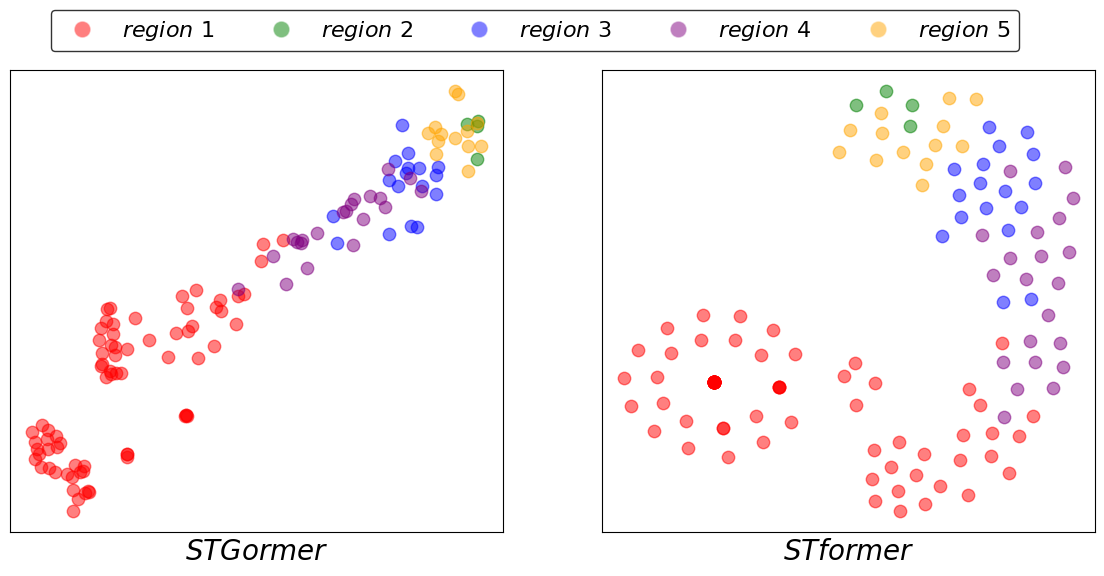

In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# 指定的batch和时间
batch_idx = 14 # 14,15
time_idx = -1
fontsize = 20
# 准备数据
features = {}
for key in data:
    features[key] = data[key][batch_idx, :, time_idx, :].squeeze()
# t-SNE变换
tsne_transformed = {}
for key in features:
    tsne = TSNE(n_components=2, random_state=0)
    tsne_transformed[key] = tsne.fit_transform(features[key])
# 绘图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
colors = ['red', 'green', 'blue', 'purple', 'orange']
variants = range(class_num)
for ax, (key, transformed) in zip(axes, tsne_transformed.items()):
    for i in variants:
        indices = labels == i
        ax.scatter(transformed[indices, 0], transformed[indices, 1], c=colors[i], alpha=0.5, s=80)
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(f'${key}$', fontsize=fontsize)

# 创建图例
legend_labels = [f'$region\ {v+1}$' for v in variants]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[v], alpha=0.5, markersize=12) for v in variants]
legend = fig.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.00), fontsize=16, ncol=len(variants), frameon=True)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.0)

# plt.tight_layout()
plt.savefig('tsne.pdf', format='pdf', bbox_inches='tight')
plt.show()